Basado en el artículo: 

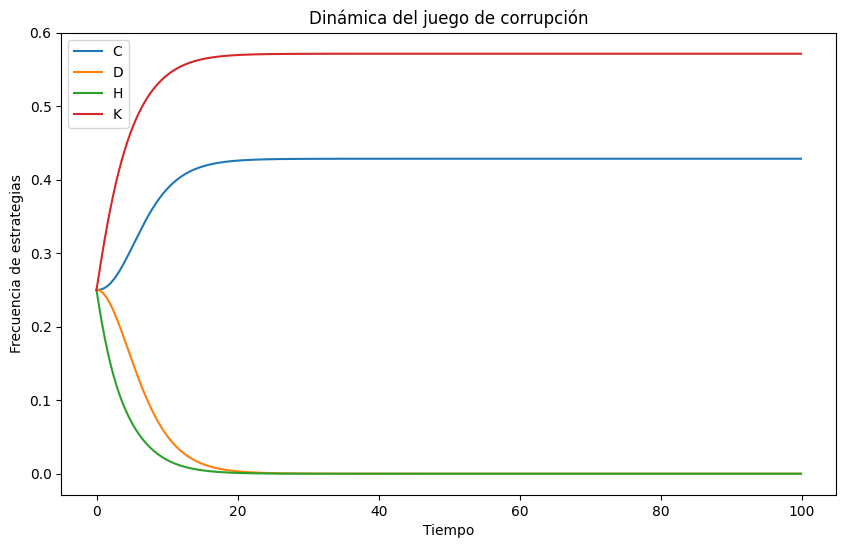

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def replicator_dynamics(x, A, t):
    dx = x * (A @ x - x @ A @ x)
    return dx

def run_simulation(A, x0, t_max, dt):
    t = np.arange(0, t_max, dt)
    x = np.zeros((len(t), 4))
    x[0] = x0
    
    for i in range(1, len(t)):
        dx = replicator_dynamics(x[i-1], A, t[i-1])
        x[i] = x[i-1] + dx * dt
        x[i] = np.clip(x[i], 0, 1)
        x[i] /= x[i].sum()
    
    return t, x

# Parámetros del juego
r = 2  # recompensa por cooperar
s = 1  # costo de ser explotado
t = 4  # tentación de no cooperar
p = 3  # castigo a civiles que no cooperan
q = 2  # castigo a policías que no cooperan
c = 0.5  # costo de castigar a civiles
d = 0.5  # costo de castigar a policías

# Matriz de pagos
A = np.array([
    [r,   -s,    r,   -s],
    [t,    0, t-p,   -p],
    [r, -s-c,    r, -s-d],
    [t,   -c, t-q, -q-d]
])

# Condiciones iniciales
x0 = np.array([0.25, 0.25, 0.25, 0.25])

# Ejecutar simulación
t, x = run_simulation(A, x0, t_max=100, dt=0.1)

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(t, x[:, 0], label='C')
plt.plot(t, x[:, 1], label='D')
plt.plot(t, x[:, 2], label='H')
plt.plot(t, x[:, 3], label='K')
plt.xlabel('Tiempo')
plt.ylabel('Frecuencia de estrategias')
plt.legend()
plt.title('Dinámica del juego de corrupción')
plt.show()


In [2]:
# Se añaden los deslizadores numéricos, primero se instala la librería
!pip install numpy matplotlib ipywidgets

     ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
     ---------- -------------------------- 41.0/139.4 kB 667.8 kB/s eta 0:00:01
     ------------------------------------ - 133.1/139.4 kB 1.3 MB/s eta 0:00:01
     ------------------------------------ 139.4/139.4 kB 922.6 kB/s eta 0:00:00
     ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
     -- ------------------------------------- 0.1/2.3 MB 2.8 MB/s eta 0:00:01
     ---- ----------------------------------- 0.3/2.3 MB 3.9 MB/s eta 0:00:01
     --------- ------------------------------ 0.6/2.3 MB 3.5 MB/s eta 0:00:01
     ------------------ --------------------- 1.1/2.3 MB 5.8 MB/s eta 0:00:01
     ------------------------------- -------- 1.8/2.3 MB 7.8 MB/s eta 0:00:01
     ------------------------------- -------- 1.8/2.3 MB 7.8 MB/s eta 0:00:01
     ------------------------------------ --- 2.1/2.3 MB 6.7 MB/s eta 0:00:01
     ---------------------------------------  2.3/2.3 MB 6.5 MB/s eta 


[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: C:\Users\Trisolaris\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def replicator_dynamics(x, A):
    dx = x * (A @ x - x @ A @ x)
    return dx

def run_simulation(r, s, t, p, q, c, d, t_max=100, dt=0.1):
    # Matriz de pagos
    A = np.array([
        [r,   -s,    r,   -s],
        [t,    0, t-p,   -p],
        [r, -s-c,    r, -s-d],
        [t,   -c, t-q, -q-d]
    ])
    
    # Condiciones iniciales
    x0 = np.array([0.25, 0.25, 0.25, 0.25])
    
    # Simulación
    t = np.arange(0, t_max, dt)
    x = np.zeros((len(t), 4))
    x[0] = x0
    
    for i in range(1, len(t)):
        dx = replicator_dynamics(x[i-1], A)
        x[i] = x[i-1] + dx * dt
        x[i] = np.clip(x[i], 0, 1)
        x[i] /= x[i].sum()
    
    # Graficar resultados
    plt.figure(figsize=(10, 6))
    plt.plot(t, x[:, 0], label='C')
    plt.plot(t, x[:, 1], label='D')
    plt.plot(t, x[:, 2], label='H')
    plt.plot(t, x[:, 3], label='K')
    plt.xlabel('Tiempo')
    plt.ylabel('Frecuencia de estrategias')
    plt.legend()
    plt.title('Dinámica del juego de corrupción')
    plt.show()

# Crear deslizadores interactivos
interact(run_simulation,
         r=widgets.FloatSlider(min=0, max=5, step=0.1, value=2, description='r:'),
         s=widgets.FloatSlider(min=0, max=5, step=0.1, value=1, description='s:'),
         t=widgets.FloatSlider(min=0, max=5, step=0.1, value=4, description='t:'),
         p=widgets.FloatSlider(min=0, max=5, step=0.1, value=3, description='p:'),
         q=widgets.FloatSlider(min=0, max=5, step=0.1, value=2, description='q:'),
         c=widgets.FloatSlider(min=0, max=2, step=0.1, value=0.5, description='c:'),
         d=widgets.FloatSlider(min=0, max=2, step=0.1, value=0.5, description='d:'))

: 